地址： https://tianchi.aliyun.com/competition/entrance/531809/information

openvino找不到模块：https://blog.csdn.net/Thomson617/article/details/101446356

In [1]:
import os

In [2]:
os.environ['Path']+= 'C:\\Program Files (x86)\\IntelSWTools\\openvino_2020.4.287\\deployment_tools\\ngraph\\lib;' \
                    'C:\\Program Files (x86)\\IntelSWTools\\openvino_2020.4.287\\deployment_tools\\inference_engine\\external\\tbb\\bin;'\
                    'C:\\Program Files (x86)\\IntelSWTools\\openvino_2020.4.287\\deployment_tools\\inference_engine\\bin\\intel64\\Debug;'\
                    'C:\\Program Files (x86)\\IntelSWTools\\openvino_2020.4.287\\deployment_tools\\inference_engine\\bin\\intel64\\Release;'\
                    'C:\\Program Files (x86)\\IntelSWTools\\openvino_2020.4.287\\deployment_tools\\inference_engine\\external\\hddl\\bin;' \
                    'C:\\Program Files (x86)\\IntelSWTools\\openvino_2020.4.287\\deployment_tools\\model_optimizer;'

In [3]:
from openvino.inference_engine import IECore,IENetwork

## 初始化模型

In [4]:
model_xml = './OpenVINO_model/road-segmentation-adas-0001.xml'
model_bin = './OpenVINO_model/road-segmentation-adas-0001.bin'

In [5]:
ie=IECore()

In [6]:
net = ie.read_network(model=model_xml,weights=model_bin)

In [7]:
exec_net = ie.load_network(network=net, device_name='CPU')

## 读取图片推断

In [8]:
import numpy as np
import cv2

In [9]:
input_blob = next(iter(net.input_info))
out_blob = next(iter(net.outputs))
n,c,h,w = net.input_info[input_blob].input_data.shape

In [10]:
image = cv2.imread('./OpenVINO_model/img1.jpg')
image = cv2.resize(image,(w,h))
image = image.transpose((2,0,1)) # HWC to CHW
image = image[np.newaxis,...]
image.shape

(1, 3, 512, 896)

In [11]:
res = exec_net.infer(inputs={input_blob:image})

In [12]:
res = res[out_blob]

## 可视化结果

In [13]:
import matplotlib.pyplot as plt

(-0.5, 895.5, 511.5, -0.5)

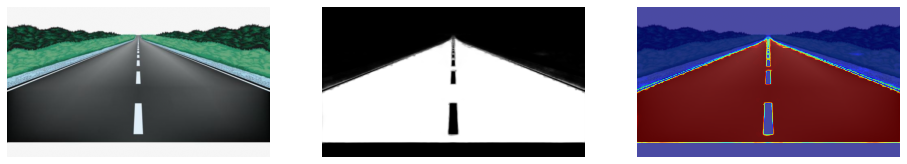

In [14]:
plt.figure(figsize=(16,16))
plt.subplot(131)
plt.imshow(image[0].transpose(1,2,0)/255.0)
plt.axis('off')
plt.subplot(132)
plt.imshow(res[0,1,...], cmap='gray')
plt.axis('off')
plt.subplot(133)
plt.imshow(image[0].transpose(1,2,0)/255.0)
plt.imshow(res[0,1,...], 'jet', interpolation='none', alpha=0.7)
plt.axis('off')